In [79]:
!ls

Data_prep.ipynb
Data_understanding-Copy1.ipynb
Data_understanding-Copy2.ipynb
Data_understanding-Copy3.ipynb
Data_understanding.ipynb
Untitled.ipynb
Untitled1.ipynb


In [80]:
!ls

Data_prep.ipynb
Data_understanding-Copy1.ipynb
Data_understanding-Copy2.ipynb
Data_understanding-Copy3.ipynb
Data_understanding.ipynb
Untitled.ipynb
Untitled1.ipynb


DATA UNDERSTANDING

In [81]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import json
pd.set_option('display.max_rows',500)

In [82]:
df = pd.read_csv(
    'https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv', 
    usecols=['Country_Region', 'Date', 'People_fully_vaccinated','Province_State'], 
    parse_dates=['Date'])

In [83]:
df.fillna(0,inplace = True)

df.drop(df[df.Province_State!= 0 ].index, inplace = True)

In [84]:
df[df['Country_Region']=='US']

,Country_Region,Date,People_fully_vaccinated,Province_State
27,US,2020-12-20,0.0,0
33,US,2020-12-21,0.0,0
40,US,2020-12-22,0.0,0
49,US,2020-12-23,0.0,0
61,US,2020-12-24,0.0,0
...,...,...,...,...
257196,US,2022-06-20,221924152.0,0
257870,US,2022-06-21,221924152.0,0
258544,US,2022-06-22,221924152.0,0
259218,US,2022-06-23,222123223.0,0


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87460 entries, 0 to 259921
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Country_Region           87460 non-null  object        
 1   Date                     87460 non-null  datetime64[ns]
 2   People_fully_vaccinated  87460 non-null  float64       
 3   Province_State           87460 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.3+ MB


In [86]:
df.head()

,Country_Region,Date,People_fully_vaccinated,Province_State
0,Canada,2020-12-14,0.0,0
1,World,2020-12-14,0.0,0
2,Canada,2020-12-15,0.0,0
3,China,2020-12-15,0.0,0
4,Russia,2020-12-15,0.0,0


In [94]:
df.drop(df[df.Date <= '2022-01-01' ].index, inplace = True)

In [95]:
df.head()

,Country_Region,Date,People_fully_vaccinated,Province_State
138960,Afghanistan,2022-01-02,3566192.0,0
138961,Albania,2022-01-02,1031132.0,0
138962,Algeria,2022-01-02,5609040.0,0
138963,Andorra,2022-01-02,50551.0,0
138964,Angola,2022-01-02,3929727.0,0


In [96]:
df_plot=pd.DataFrame({
    'Date':df.Date.unique()})

In [97]:
country_list=['Germany','India','Canada','Spain']
for each in country_list:
    df_plot[each]=np.array(df[df['Country_Region']==each].iloc[:,2])

In [98]:
df_plot

,Date,Germany,India,Canada,Spain
0,2022-01-02,59189767.0,607094031.0,29414103.0,37865247.0
1,2022-01-03,59209560.0,611955199.0,29414892.0,38016879.0
2,2022-01-04,59371059.0,614541749.0,29450265.0,38028178.0
3,2022-01-05,59483838.0,617737538.0,29467043.0,38041112.0
4,2022-01-06,59574879.0,620902308.0,29490152.0,38041112.0
5,2022-01-07,59574879.0,625966848.0,29500133.0,38052240.0
6,2022-01-08,59683677.0,627076701.0,29514160.0,38052240.0
7,2022-01-09,59683677.0,627076701.0,29517260.0,38052240.0
8,2022-01-10,59883814.0,634265259.0,29546468.0,38079025.0
9,2022-01-11,60004889.0,640117846.0,29570238.0,38093934.0


<AxesSubplot:xlabel='Date'>

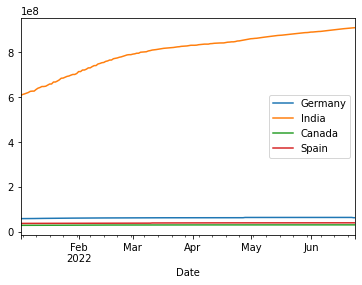

In [99]:
%matplotlib inline
df_plot.set_index('Date').plot()

In [100]:
df1 = pd.read_csv(r'C:\Users\ROHITH  BATTHINENI\eds_covid-19\data\raw\population_by_country_2020.csv',
                  usecols=['Country (or dependency)', 'Population (2020)'])

In [101]:
df1

,Country (or dependency),Population (2020)
0,China,1440297825
1,India,1382345085
2,United States,331341050
3,Indonesia,274021604
4,Pakistan,221612785
5,Brazil,212821986
6,Nigeria,206984347
7,Bangladesh,164972348
8,Russia,145945524
9,Mexico,129166028


In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Country (or dependency)  235 non-null    object
 1   Population (2020)        235 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


In [103]:
df2

,Country (or dependency),Population (2020)
1,India,1382345085
18,Germany,83830972
29,Spain,46757980
38,Canada,37799407


In [123]:

df2=df1.loc[df1['Country (or dependency)'].isin(['Germany','India','Canada','Spain','United States'])

SyntaxError: unexpected EOF while parsing (<ipython-input-123-0981eb6cde95>, line 1)

In [106]:
df2

,Country (or dependency),Population (2020)
1,India,1382345085
18,Germany,83830972
29,Spain,46757980
38,Canada,37799407


In [108]:
df2.transpose()

,1,18,29,38
Country (or dependency),India,Germany,Spain,Canada
Population (2020),1382345085,83830972,46757980,37799407


In [117]:

df2

,Country (or dependency),Population (2020)
1,India,1382345085
18,Germany,83830972
29,Spain,46757980
38,Canada,37799407


In [118]:
df_plot

,Date,Germany,India,Canada,Spain
0,2022-01-02,59189767.0,607094031.0,29414103.0,37865247.0
1,2022-01-03,59209560.0,611955199.0,29414892.0,38016879.0
2,2022-01-04,59371059.0,614541749.0,29450265.0,38028178.0
3,2022-01-05,59483838.0,617737538.0,29467043.0,38041112.0
4,2022-01-06,59574879.0,620902308.0,29490152.0,38041112.0
5,2022-01-07,59574879.0,625966848.0,29500133.0,38052240.0
6,2022-01-08,59683677.0,627076701.0,29514160.0,38052240.0
7,2022-01-09,59683677.0,627076701.0,29517260.0,38052240.0
8,2022-01-10,59883814.0,634265259.0,29546468.0,38079025.0
9,2022-01-11,60004889.0,640117846.0,29570238.0,38093934.0


In [143]:
df_plot.insert(2,"Ger_pop",(df_plot.iloc[:,1]/df2.iloc[1,1])*100)

ValueError: cannot insert Ger_pop, already exists

In [132]:
df2=df2.transpose()

In [153]:
df2.iloc[1,3]

37799407

In [142]:
df_plot

,Date,Germany,Ger_pop,India,Canada,Spain
0,2022-01-02,59189767.0,0.706061,607094031.0,29414103.0,37865247.0
1,2022-01-03,59209560.0,0.706297,611955199.0,29414892.0,38016879.0
2,2022-01-04,59371059.0,0.708223,614541749.0,29450265.0,38028178.0
3,2022-01-05,59483838.0,0.709569,617737538.0,29467043.0,38041112.0
4,2022-01-06,59574879.0,0.710655,620902308.0,29490152.0,38041112.0
5,2022-01-07,59574879.0,0.710655,625966848.0,29500133.0,38052240.0
6,2022-01-08,59683677.0,0.711953,627076701.0,29514160.0,38052240.0
7,2022-01-09,59683677.0,0.711953,627076701.0,29517260.0,38052240.0
8,2022-01-10,59883814.0,0.714340,634265259.0,29546468.0,38079025.0
9,2022-01-11,60004889.0,0.715784,640117846.0,29570238.0,38093934.0


In [146]:
df_plot.drop("Ger_pop", axis=1,inplace = True)

In [147]:
df_plot

,Date,Germany,India,Canada,Spain
0,2022-01-02,59189767.0,607094031.0,29414103.0,37865247.0
1,2022-01-03,59209560.0,611955199.0,29414892.0,38016879.0
2,2022-01-04,59371059.0,614541749.0,29450265.0,38028178.0
3,2022-01-05,59483838.0,617737538.0,29467043.0,38041112.0
4,2022-01-06,59574879.0,620902308.0,29490152.0,38041112.0
5,2022-01-07,59574879.0,625966848.0,29500133.0,38052240.0
6,2022-01-08,59683677.0,627076701.0,29514160.0,38052240.0
7,2022-01-09,59683677.0,627076701.0,29517260.0,38052240.0
8,2022-01-10,59883814.0,634265259.0,29546468.0,38079025.0
9,2022-01-11,60004889.0,640117846.0,29570238.0,38093934.0


In [148]:
df_plot.insert(2,"Ger_pop",(df_plot.iloc[:,1]/df2.iloc[1,1])*100)

In [149]:
df_plot

,Date,Germany,Ger_pop,India,Canada,Spain
0,2022-01-02,59189767.0,70.606085,607094031.0,29414103.0,37865247.0
1,2022-01-03,59209560.0,70.629695,611955199.0,29414892.0,38016879.0
2,2022-01-04,59371059.0,70.822344,614541749.0,29450265.0,38028178.0
3,2022-01-05,59483838.0,70.956875,617737538.0,29467043.0,38041112.0
4,2022-01-06,59574879.0,71.065476,620902308.0,29490152.0,38041112.0
5,2022-01-07,59574879.0,71.065476,625966848.0,29500133.0,38052240.0
6,2022-01-08,59683677.0,71.195258,627076701.0,29514160.0,38052240.0
7,2022-01-09,59683677.0,71.195258,627076701.0,29517260.0,38052240.0
8,2022-01-10,59883814.0,71.433997,634265259.0,29546468.0,38079025.0
9,2022-01-11,60004889.0,71.578424,640117846.0,29570238.0,38093934.0


In [152]:
df_plot.insert(4,"Ind_pop",(df_plot.iloc[:,3]/df2.iloc[1,0])*100)

In [154]:
df_plot.insert(6,"Can_pop",(df_plot.iloc[:,5]/df2.iloc[1,3])*100)

In [155]:
df_plot

,Date,Germany,Ger_pop,India,Ind_pop,Canada,Can_pop,Spain
0,2022-01-02,59189767.0,70.606085,607094031.0,43.917690,29414103.0,77.816308,37865247.0
1,2022-01-03,59209560.0,70.629695,611955199.0,44.269351,29414892.0,77.818395,38016879.0
2,2022-01-04,59371059.0,70.822344,614541749.0,44.456464,29450265.0,77.911976,38028178.0
3,2022-01-05,59483838.0,70.956875,617737538.0,44.687650,29467043.0,77.956363,38041112.0
4,2022-01-06,59574879.0,71.065476,620902308.0,44.916592,29490152.0,78.017499,38041112.0
5,2022-01-07,59574879.0,71.065476,625966848.0,45.282966,29500133.0,78.043904,38052240.0
6,2022-01-08,59683677.0,71.195258,627076701.0,45.363253,29514160.0,78.081013,38052240.0
7,2022-01-09,59683677.0,71.195258,627076701.0,45.363253,29517260.0,78.089214,38052240.0
8,2022-01-10,59883814.0,71.433997,634265259.0,45.883279,29546468.0,78.166486,38079025.0
9,2022-01-11,60004889.0,71.578424,640117846.0,46.306661,29570238.0,78.229370,38093934.0


In [159]:
df_plot.drop("Spain", axis=1,inplace = True)

In [160]:
df_plot

,Date,Ger_pop,Ind_pop,Can_pop
0,2022-01-02,70.606085,43.917690,77.816308
1,2022-01-03,70.629695,44.269351,77.818395
2,2022-01-04,70.822344,44.456464,77.911976
3,2022-01-05,70.956875,44.687650,77.956363
4,2022-01-06,71.065476,44.916592,78.017499
5,2022-01-07,71.065476,45.282966,78.043904
6,2022-01-08,71.195258,45.363253,78.081013
7,2022-01-09,71.195258,45.363253,78.089214
8,2022-01-10,71.433997,45.883279,78.166486
9,2022-01-11,71.578424,46.306661,78.229370


<AxesSubplot:xlabel='Date'>

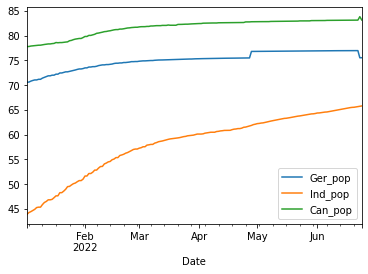

In [161]:
%matplotlib inline
df_plot.set_index('Date').plot()